In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [ ]:
file = open("metamorphosis_clean.txt", "r", encoding = "utf8")
lines = []
for i in file:
    lines.append(i)
print("The First Line: ", lines[0])
print("The Last Line: ", lines[-1])

The First Line:  ﻿One morning, when Gregor Samsa woke from troubled dreams, he found

The Last Line:  first to get up and stretch out her young body.


In [ ]:
data = ""
for i in lines:
    data = ' '. join(lines)
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
data[:360]

'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin.  He lay on his armour-like back, and if he lifted his head a little he could see his brown belly, slightly domed and divided by arches into stiff sections.  The bedding was hardly able to cover it and seemed ready to slide off any moment.'

In [ ]:
import string
translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
new_data = data.translate(translator)
new_data[:500]

'One morning  when Gregor Samsa woke from troubled dreams  he found himself transformed in his bed into a horrible vermin   He lay on his armour like back  and if he lifted his head a little he could see his brown belly  slightly domed and divided by arches into stiff sections   The bedding was hardly able to cover it and seemed ready to slide off any moment   His many legs  pitifully thin compared with the size of the rest of him  waved about helplessly as he looked    What s happened to me   he'

In [ ]:
z = []
for i in data.split():
    if i not in z:
        z.append(i)
data = ' '.join(z)
data[:500]

'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin. He lay on armour-like back, and if lifted head little could see brown belly, slightly domed divided by arches stiff sections. The bedding was hardly able to cover it seemed ready slide off any moment. His many legs, pitifully thin compared with the size of rest him, waved about helplessly as looked. "What\'s happened me?" thought. It wasn\'t dream. room, proper human room altho'

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))
sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:10]

[17, 53, 293, 2, 18, 729, 135, 730, 294, 8]

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

2617


In [ ]:
sequences = []
for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  3889


array([[ 17,  53],
       [ 53, 293],
       [293,   2],
       [  2,  18],
       [ 18, 729],
       [729, 135],
       [135, 730],
       [730, 294],
       [294,   8],
       [  8, 731]])

In [ ]:
X = []
y = []
for i in sequences:
    X.append(i[0])
    y.append(i[1])
X = np.array(X)
y = np.array(y)

In [ ]:
print("The Data is: ", X[:5])
print("The responses are: ", y[:5])

The Data is:  [ 17  53 293   2  18]
The responses are:  [ 53 293   2  18 729]


In [ ]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 10)             26170     
_________________________________________________________________
lstm (LSTM)                  (None, 1, 1000)           4044000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 1000)              8004000   
_________________________________________________________________
dense (Dense)                (None, 1000)              1001000   
_________________________________________________________________
dense_1 (Dense)              (None, 2617)              2619617   
Total params: 15,694,787
Trainable params: 15,694,787
Non-trainable params: 0
_________________________________________________________________


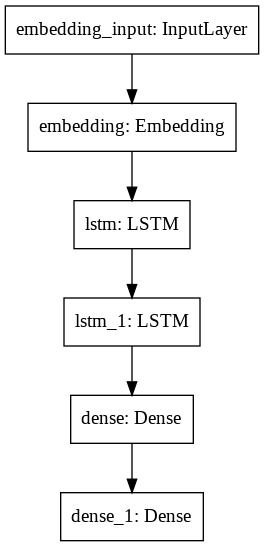

In [ ]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model
keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard
checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')
reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)
logdir='logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001))


In [ ]:
model.fit(X, y, epochs=150, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])


Epoch 1/150
61/61 [==============================] - 17s 220ms/step - loss: 7.8719

Epoch 00001: loss improved from inf to 7.87493, saving model to nextword1.h5
Epoch 2/150
61/61 [==============================] - 13s 216ms/step - loss: 7.8625

Epoch 00002: loss improved from 7.87493 to 7.86255, saving model to nextword1.h5
Epoch 3/150
61/61 [==============================] - 13s 216ms/step - loss: 7.8000

Epoch 00003: loss improved from 7.86255 to 7.81425, saving model to nextword1.h5
Epoch 4/150
61/61 [==============================] - 13s 216ms/step - loss: 7.6004

Epoch 00004: loss improved from 7.81425 to 7.61280, saving model to nextword1.h5
Epoch 5/150
61/61 [==============================] - 13s 215ms/step - loss: 7.3593

Epoch 00005: loss improved from 7.61280 to 7.39138, saving model to nextword1.h5
Epoch 6/150
61/61 [==============================] - 13s 216ms/step - loss: 7.1756

Epoch 00006: loss improved from 7.39138 to 7.22293, saving model to nextword1.h5
Epoch 7/150
61

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer

model = load_model('nextword1.h5')
tokenizer = pickle.load(open('tokenizer1.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):
    """
        In this function we are using the tokenizer and models trained
        and we are creating the sequence of the text entered and then
        using our model to predict and return the the predicted word.
    
    """
    for i in range(3):
        sequence = tokenizer.texts_to_sequences([text])[0]
        sequence = np.array(sequence)
        
        preds = model.predict_classes(sequence)
#         print(preds)
        predicted_word = ""
        
        for key, value in tokenizer.word_index.items():
            if value == preds:
                predicted_word = key
                break
        
        print(predicted_word)
        return predicted_word

In [ ]:
while(True):

    text = input("Enter your line: ")
    
    if text == "stop the script":
        print("Ending The Program.....")
        break
    
    else:
        try:
            text = text.split(" ")
            text = text[-1]

            text = ''.join(text)
            Predict_Next_Words(model, tokenizer, text)
            
        except:
            continue

Enter your line: What's happened


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


contrast
Enter your line: at the dull
weather
Enter your line: what a strenuous
career
Enter your line: He was still
sitting
Enter your line: stop the script
Ending The Program.....
